## Exercises

1. Load and display the image 'dog.jfif'. Save the image in png format.
2. *Suggest 2 ways and write codes to display 2 images simultaneously.* You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.
3. Write codes that performs the following:
    * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
    * Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"
4. Enlarge the image "dog.jfif" by using different techniques:
    1) Linear interpolation
   2) Cubic interpolation
   3) Nearest neighbor interpolation.
   4) Lanczos interpolation.

Perform profiling on each method. Comment on the **execution times** and **quality of resulting images**.

Question 1

In [7]:
import cv2 as cv

img = cv.imread("images/dog.jfif")

cv.imshow("dog", img)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imwrite("images/dog11.png", img)

True

Question 2

In [6]:
# 1st way
images = [cv.imread("images/alan.jpeg"), cv.imread("images/alan.jpeg", 0)]
titles = ["alan", "alan_gray"]

for img, title in zip(images, titles):
        cv.imshow(title, img)

cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
# 2nd way
from IPython.display import display
from PIL import Image

# Load the images
image1 = Image.open('images/nature.jpg')
image2 = Image.open('images/nature.jpg')

# Display the images side by side
display(image1, image2)


Question 3

In [9]:
# Question 3
cap = cv.VideoCapture('videos/img_pexels.mp4')

w, h = int(cap.get(3)), int(cap.get(4))
print(w, h) # 1080 1920
new_dim = (w - 20, h - 50)

fps = cap.get(5) # 60.0
print(fps)
new_fps = fps - 40.0

fourcc = cv.VideoWriter_fourcc('M', 'J', 'P', 'G')
out = cv.VideoWriter("videos/img_pixels1.avi", fourcc, fps, (h, w))

if not cap.isOpened():
    raise Exception("No video detected") 

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print("end of file")
        break

    out.write(frame)

    cv.imshow('frame', frame)
    if cv.waitKey(1) & 0xFF == 27:
        break

cap.release()
out.release()
cv.destroyAllWindows()

1080 1920
60.0


Question 4

In [46]:
import matplotlib.pyplot as plt

img = cv.imread("images/dog.jfif")
print(img.shape)

(168, 300, 3)


261 µs ± 59.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


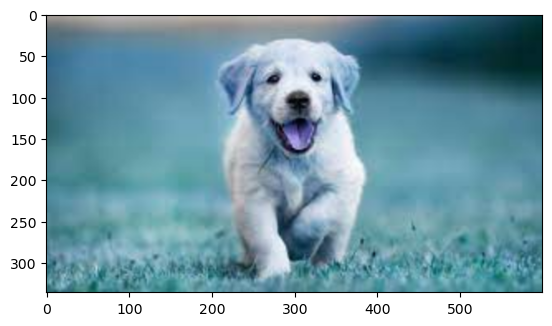

In [50]:
# A
new_shape = (600, 336)
%timeit img_resized = cv.resize(img, new_shape, interpolation=cv.INTER_LINEAR)
plt.imshow(img_resized)

459 µs ± 18.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


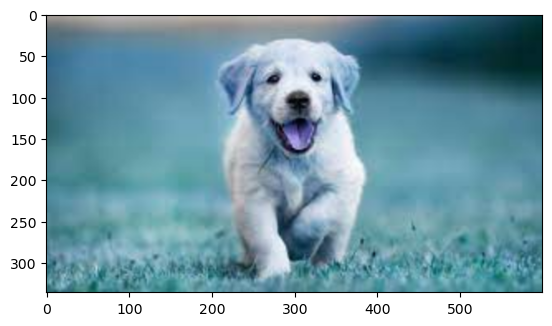

In [52]:
# B
%timeit img_resized = cv.resize(img, new_shape, interpolation=cv.INTER_CUBIC)
plt.imshow(img_resized)

220 µs ± 7.88 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


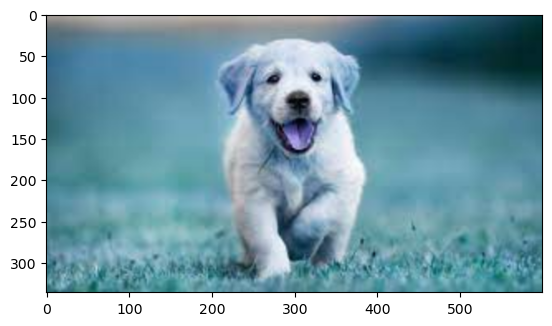

In [54]:
# C

%timeit img_resized = cv.resize(img, new_shape, interpolation=cv.INTER_NEAREST)
plt.imshow(img_resized)

2 ms ± 39.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


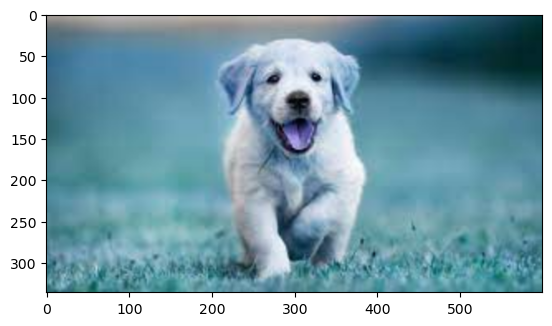

In [60]:
# D
%timeit img_resized = cv.resize(img, new_shape, interpolation=cv.INTER_LANCZOS4)
plt.imshow(img_resized)

Execution time: <br>
    lanczos > cubic > linear > nearest <br>
(longest time) ----------------- (least time)

Quality: <br>
Linear Interpolation: Smooth but may lose some sharpness. <br>
Cubic Interpolation: Smoother and retains more detail compared to linear. <br>
Nearest Neighbor Interpolation: Blocky and pixelated. <br>
Lanczos Interpolation: High quality with good detail preservation, but may introduce ringing artifacts. <br>